# Case de Análise de Dados no Pandas!

Iremos usar o banco de dados [Online Retail.xlsx](https://archive.ics.uci.edu/ml/datasets/Online+Retail), disponível no [Repositório de Dados para Machine Learning da UCI](https://archive.ics.uci.edu/ml/index.php). Para efeitos didáticos, eu fiz uma transformação no banco de dados para incluir a coluna `region`, que contém o nome do país assim como do continente.

![title](imgs/uci-logo.png)

### Importando as bibliotecas necessárias e o banco de dados

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = spark.read.csv("/FileStore/tables/retail.csv", header=True, sep=';')
df = df.toPandas()

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom


In [0]:
df.describe()

Out[13]: count     541909
unique      1630
top         1,25
freq       50496
Name: unit_price, dtype: object

In [0]:
display(dbutils.fs.ls('/FileStore/tables/'))

path,name,size,modificationTime
dbfs:/FileStore/tables/base_clientes1.csv,base_clientes1.csv,1320,1630424514000


#### Significado das colunas:

* `invoice_no`: número do pedido
* `stock_code`: número único que caracteriza o item/produto (SKU)
* `description`: descrição/nome do produto
* `quantity`: quantidade do produto vendida
* `invoice_date`: data em que o pedido foi realizado
* `unit_price`: preço unitário
* `customer_id`: identificador único do cliente
* `region`: região de onde o cliente realizou a compra

# Operações básicas de dados no Pandas

## 1. Selecionando colunas

Existem 2 formas de selecionar colunas no Pandas: a primeira é usando o `parênteses` e a segunda usando o método `filter()`.

In [0]:
df[['stock_code', 'unit_price']]

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
df.filter(['stock_code', 'unit_price'])

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
Pesquisando colunas por nome

In [0]:
df.filter(like='id')

,customer_id
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
541904,12680
541905,12680
541906,12680
541907,12680


In [0]:
Criando uma dataframe.
Incluindo colunas

In [0]:
toy_df = pd.DataFrame({'pedido_id': [1, 1, 2, 3, 3], 
                       'produto_id': [251, 985, 390, 204, 985], 
                       'descricao': ['carro', 'boneca', 'celular', 'caderno', 'boneca'], 
                       'data_compra': ['2020-03-01', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-03'], 
                       'data_entrega': ['2020-03-02', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-04'], 
                       'valor_item': [25000, 30, 2000, 15, 30], 
                       'quantidade': [1, 1, 1, 2, 3]})
toy_df

,pedido_id,produto_id,descricao,data_compra,data_entrega,valor_item,quantidade
0,1,251,carro,2020-03-01,2020-03-02,25000,1
1,1,985,boneca,2020-03-01,2020-03-02,30,1
2,2,390,celular,2020-03-02,2020-03-03,2000,1
3,3,204,caderno,2020-03-03,2020-03-04,15,2
4,3,985,boneca,2020-03-03,2020-03-04,30,3


In [0]:
Verificar quantas linhas e colunas tem no dataframe

In [0]:
toy_df.shape

Out[22]: (5, 7)

In [0]:
Pesquisando todas as colunas que tem a palavra data.

In [0]:
toy_df.filter(like='data')

,data_compra,data_entrega
0,2020-03-01,2020-03-02
1,2020-03-01,2020-03-02
2,2020-03-02,2020-03-03
3,2020-03-03,2020-03-04
4,2020-03-03,2020-03-04


In [0]:
toy_df.filter(like='id')

,pedido_id,produto_id,quantidade
0,1,251,1
1,1,985,1
2,2,390,1
3,3,204,2
4,3,985,3


## 2. Filtros

Também existem duas formas de realizar filtros no Pandas: uma com `parênteses` e outra com o método `query()`.

In [0]:
df[df['invoice_no'] == '536368']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,4.25,13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,01/12/2010 08:34,4.95,13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01/12/2010 08:34,4.95,13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,01/12/2010 08:34,4.95,13047,United Kingdom


In [0]:
df.query('invoice_no == "536368"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom


#### Filtrando com duas condições

Condição `and`

In [0]:
df[(df['invoice_no'] == '536368') & (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom


In [0]:
df.query('invoice_no == "536368" and stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom


Condição `or`

In [0]:
df[(df['invoice_no'] == '536368') | (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,12/1/10 9:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,12/8/11 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,12/8/11 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,12/8/11 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,12/9/11 10:03,"8,29",None,United Kingdom


In [0]:
df.query('invoice_no == "536368" or stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,12/1/10 9:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,12/8/11 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,12/8/11 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,12/8/11 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,12/9/11 10:03,"8,29",None,United Kingdom


## 3. Criando novas colunas

Existem duas formas de criar colunas com o Pandas: uma com `parênteses` e outra usando o método `assign()`.

In [0]:
df['total_price'] = df['quantity'] + df['unit_price']

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
Excluindo uma coluna.

In [0]:
df.drop('total_price', axis=1, inplace=True)

In [0]:
df.assign(total_price = df['quantity'] + df['unit_price']).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


O método `assign()` não modifica a tabela inplace. O que o torna uma boa opção para validar a nova coluna criada antes de efetivamente adicioná-la na tabela.

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


Para salvar a coluna de fato, devemos atribuir a operação para uma tabela.

In [0]:
df = df.assign(total_price = df['quantity'] + df['unit_price'])

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.drop('total_price', axis=1, inplace=True)

## 4. Ordenando colunas

Aqui, existem apenas um método: `sort_values()`.

In [0]:
df.sort_values('invoice_date').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
50806,540558,21258,?,-29,1/10/11 10:04,0,None,United Kingdom
50807,C540559,21888,BINGO SET,-4,1/10/11 10:07,"3,75",None,EIRE
50808,540560,21589,None,-14,1/10/11 10:08,0,None,United Kingdom
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/11 10:32,"0,85",13004,United Kingdom
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/11 10:32,"1,25",13004,United Kingdom


In [0]:
df.sort_values('invoice_date', ascending=False).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
332571,566079,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,24,9/9/11 9:52,"0,85",17593,United Kingdom
332544,566079,23403,LETTER HOLDER HOME SWEET HOME,4,9/9/11 9:52,"3,75",17593,United Kingdom
332551,566079,22396,MAGNETS PACK OF 4 RETRO PHOTO,24,9/9/11 9:52,"0,39",17593,United Kingdom
332550,566079,22400,MAGNETS PACK OF 4 HOME SWEET HOME,24,9/9/11 9:52,"0,39",17593,United Kingdom
332549,566079,20838,FRENCH LATTICE CUSHION COVER,12,9/9/11 9:52,"0,85",17593,United Kingdom


## 5. Aggregações

No Pandas podemos criar agregações de duas formas: em uma coluna ou em grupos.

### Agregações em uma coluna

In [0]:
df['invoice_date'].min()

Out[28]: '1/10/11 10:04'

In [0]:
df['invoice_date'].max()

Out[29]: '9/9/11 9:52'

In [0]:
df.agg({'invoice_date': ['min', 'max']})

,invoice_date
min,1/10/11 10:04
max,9/9/11 9:52


### Agregações no método `groupby()`

In [0]:
Reset_index cria um índice para os valores da coluna que estiver no groupby

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index()

,invoice_no,n
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
...,...,...
25895,C581484,1
25896,C581490,2
25897,C581499,1
25898,C581568,1


In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count'))

,n
invoice_no,
536365,7
536366,2
536367,12
536368,4
536369,1
...,...
C581484,1
C581490,2
C581499,1


## 6. Combinando as operações

Limpando os nossos dados. Pedidos com começam com a letra `C` foram cancelados, logo devem ser retirados da base de dados.
Também temos pedidos com quantidades negativas, que significa que ou foram cancelados ou estornados.

In [0]:
#df.sort_values('invoice_date', ascending=False).head()
df.groupby('quantity').agg(n=('stock_code', 'count'))

,n
quantity,
-1,4184
-10,197
-100,60
-1000,1
-101,2
...,...
97,3
972,2
98,6


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   invoice_no    541909 non-null  object
 1   stock_code    541909 non-null  object
 2   description   540455 non-null  object
 3   quantity      541909 non-null  object
 4   invoice_date  541909 non-null  object
 5   unit_price    541909 non-null  object
 6   customer_id   406829 non-null  object
 7   region        541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [0]:
# se a coluna start_with_c for criada dessa forma:.assign(start_with_c = df['invoice_no'].str.startswith('C')), ela não pode ser utilizada no mesmo step(bloco de codigo). Usando a função lambda faz com que a coluna fique disponivel para ser usada no mesmo bloco de codigo.
df2 = (
    df
    .assign(start_with_c = lambda x: x['invoice_no'].str.startswith('C'))
    .query('start_with_c == False')
    .query('quantity >= "0"')
)

In [0]:
#teste para saber se o step anterior deu certo.
df2.groupby('quantity').agg(n=('stock_code', 'count'))

,n
quantity,
1,148227
10,22288
100,1819
1000,13
1008,4
...,...
97,3
972,2
98,6


##### Realize uma 'query' que retorne os top 10 pedidos com mais itens.

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index().sort_values('n', ascending=False).head(10)

,invoice_no,n
18141,573585,1114
21897,581219,749
22032,581492,731
21645,580729,721
10713,558475,705
21164,579777,687
21895,581217,676
576,537434,675
21646,580730,662
881,538071,652


Traga a data em que o pedido foi realizado

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
)

,invoice_no,n,datetime
18141,573585,1114,31/10/2011 14:41
21897,581219,749,08/12/2011 09:28
22032,581492,731,09/12/2011 10:03
21645,580729,721,05/12/2011 17:24
10713,558475,705,29/06/2011 15:58
21164,579777,687,30/11/2011 15:13
21895,581217,676,08/12/2011 09:20
576,537434,675,06/12/2010 16:57
21646,580730,662,05/12/2011 17:28
881,538071,652,09/12/2010 14:09


Crie uma coluna apenas com a data --> valendo 1 ponto
### -> retornamos segunda

In [0]:
import datetime as dt
from datetime import date

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   invoice_no    541909 non-null  object
 1   stock_code    541909 non-null  object
 2   description   540455 non-null  object
 3   quantity      541909 non-null  object
 4   invoice_date  541909 non-null  object
 5   unit_price    541909 non-null  object
 6   customer_id   406829 non-null  object
 7   region        541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [0]:
# criar um novo dataframe que contem a coluna datetime
#formatar a coluna date time para data: pd.to_datetime
# formatar novamente usando dt.strftime
    df2 = df \
    .groupby('invoice_no') \
    .agg(n        = ('stock_code', 'count'),
         datetime = ('invoice_date', 'first')) \
    .reset_index() \
    .sort_values('n', ascending=False) \
    .head(10)
#    .assign(data = dt.strftime('%Y-%m-%d'))
#    .assign(data = dt.date.today())
#    .assign(date2 = date.today())
 #   .assign(date3 = date(2023, 4, 24))
    #df['Data'] = df['Data e Hora'].dt.strftime('%Y-%m-%d')
    #.assign(date4 = pd.to_datetime(x['datetime'], format='%d/%m/%Y %H:%M').dt.strftime('%Y-%m-%d'))
  
    
#)
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2['datetime'] = df2['datetime'].dt.strftime('%Y-%m-%d')
df2.head(10)

,invoice_no,n,datetime
18141,573585,1114,2011-10-31
21897,581219,749,2011-08-12
22032,581492,731,2011-09-12
21645,580729,721,2011-05-12
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-08-12
576,537434,675,2010-06-12
21646,580730,662,2011-05-12
881,538071,652,2010-09-12


No pandas, assim como no SQL, não conseguimos referenciar uma coluna que acabou de ser criada. Para conseguirmos fazer isso, podemos usar funções lambda!

DESAFIO VALENDO 1 PONTO! CASA!

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(date1 = lambda x: pd.to_datetime(x['datetime'], format='%d/%m/%Y %H:%M').dt.strftime('%d/%m/%Y'))
)
#.assign(date = lambda x: x['datetime'].dt.date)    - Original

,invoice_no,n,datetime,date1
18141,573585,1114,31/10/2011 14:41,31/10/2011
21897,581219,749,08/12/2011 09:28,08/12/2011
22032,581492,731,09/12/2011 10:03,09/12/2011
21645,580729,721,05/12/2011 17:24,05/12/2011
10713,558475,705,29/06/2011 15:58,29/06/2011
21164,579777,687,30/11/2011 15:13,30/11/2011
21895,581217,676,08/12/2011 09:20,08/12/2011
576,537434,675,06/12/2010 16:57,06/12/2010
21646,580730,662,05/12/2011 17:28,05/12/2011
881,538071,652,09/12/2010 14:09,09/12/2010


A coluna `datetime` não é do time datetime. Ela é do tipo `object`.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .dtypes
)

Out[87]: invoice_no    object
n              int64
datetime      object
dtype: object

Então, para resolvermos o problema temos que transformar o tipo da coluna para datetime e só depois conseguiremos performar a operação desejada.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .dtypes
)

Out[88]: invoice_no            object
n                      int64
datetime      datetime64[ns]
dtype: object

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
)

,invoice_no,n,datetime,date
18141,573585,1114,2011-10-31 14:41:00,2011-10-31
21897,581219,749,2011-08-12 09:28:00,2011-08-12
22032,581492,731,2011-09-12 10:03:00,2011-09-12
21645,580729,721,2011-05-12 17:24:00,2011-05-12
10713,558475,705,2011-06-29 15:58:00,2011-06-29
21164,579777,687,2011-11-30 15:13:00,2011-11-30
21895,581217,676,2011-08-12 09:20:00,2011-08-12
576,537434,675,2010-06-12 16:57:00,2010-06-12
21646,580730,662,2011-05-12 17:28:00,2011-05-12
881,538071,652,2010-09-12 14:09:00,2010-09-12


Agora, vamos dropar a coluna `datetime`. 

Jeito 1:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .drop('datetime', axis=1)
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


Jeito 2:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom


In [0]:
top_10_invoice_df = (
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

In [0]:
top_10_invoice_df

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


### Vamos fazer um gráfico de barras

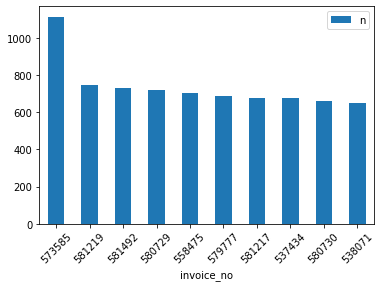

In [0]:
top_10_invoice_df.plot(kind='bar', x='invoice_no', y='n', rot=45);

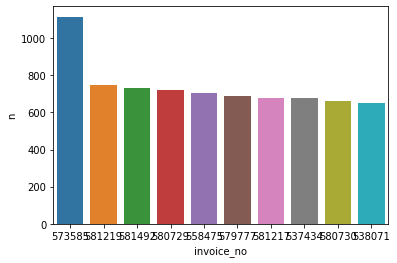

In [0]:
import seaborn as sns


sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n');

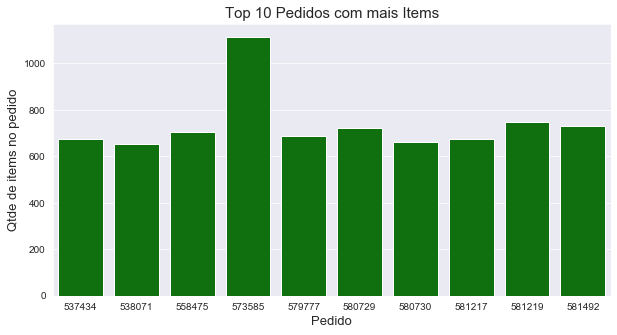

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

In [0]:
import matplotlib.pyplot as plt

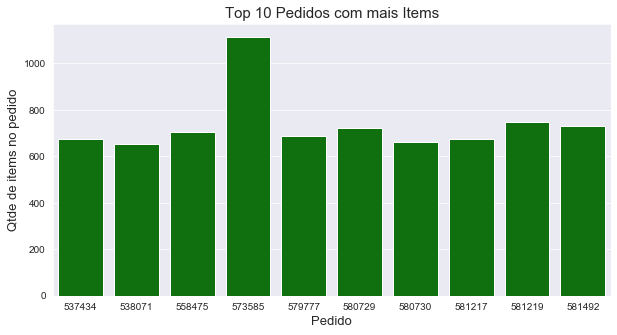

In [0]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

### Vamos fazer um boxplot do preço total do pedido

valendo 0,5!

In [0]:
df.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,"7,65",17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,"4,25",17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,"1,85",17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,"1,85",17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 08:34,"1,69",13047,United Kingdom


In [0]:

df['quantity'] = df['quantity'].astype(int)
#df['unit_price'] = df['unit_price'].astype(float)
df = df.assign(unit_price = df['unit_price'].str.replace(',','.').astype(float))
#df['unit_price'] =pd.to_numeric(df['unit_price'])
revenue_by_invoice_df = (
    df
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('invoice_no')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
    .filter(['invoice_no', 'revenue'])
)



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  object 
 7   region        541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [0]:
revenue_by_invoice_df

,invoice_no,revenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
25895,C581484,-168469.60
25896,C581490,-32.53
25897,C581499,-224.69
25898,C581568,-54.75


In [0]:
# Normalização da coluna Revenue
df_norm = revenue_by_invoice_df.copy() 
df_norm['revenue'] = df_norm['revenue']  / df_norm['revenue'].abs().max() 
      
display(df_norm) 

invoice_no,revenue
536365,8.257869669067891E-4
536366,1.3177451599576424E-4
536367,0.0016544824704278992
536368,4.1580202006771556E-4
536369,1.0595383380740502E-4
536370,0.005080204381087152
536371,0.0012109009577989144
536372,1.3177451599576424E-4
536373,0.0015424741318314996
536374,0.0020799004686899


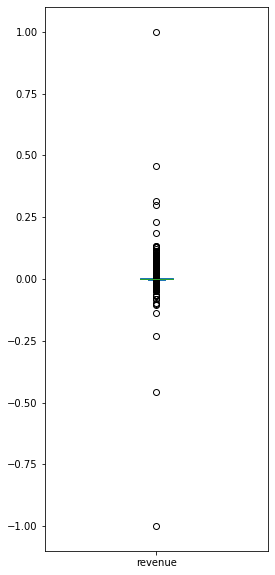

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 10))
#plt.boxplot(revenue_by_invoice_df)
#revenue_by_invoice_df.plot(kind='box');
df_norm['revenue'].plot(kind='box');
#plt.boxplot(df_norm)


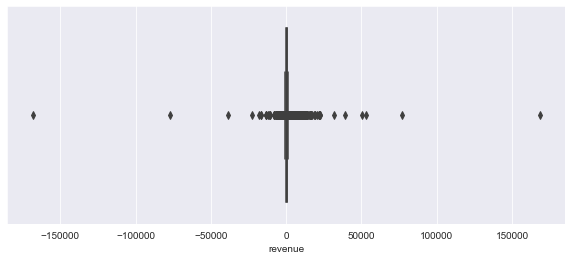

In [0]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(data=revenue_by_invoice_df, x='revenue', ax=ax);

Vamos fazer o mesmo boxplot, mas para cada mês

valendo 0,5!

In [0]:
#df['quantity'] = df['quantity'].astype(int)

revenue_invoice_month_df = (
    df
    .assign(invoice_date = lambda x: pd.to_datetime(x['invoice_date']))
    .assign(month = lambda x: x['invoice_date'].dt.month)
    .assign(total_price = lambda x: x['unit_price'] * x['quantity'])
    .filter(['invoice_no', 'month', 'total_price'])
    .groupby('invoice_no')
    .agg(month = ('month', 'first'),
         revenue = ('total_price', 'sum'))
    .reset_index()
    
)
revenue_invoice_month_df.head()


#revenue_invoice_month_df = (
#    df
#    .assign(invoice_date = lambda x: pd.to_datetime(x['invoice_date']))
#    .assign(month = lambda x: x['invoice_date'].dt.month)
#    .assign(total_price = lambda x: x['unit_price'] * x['quantity'])
#    .filter(['invoice_no', 'month', 'total_price'])
#    .groupby('invoice_no')
#    .agg(month = ('month', 'first'),
#         revenue = ('total_price', 'sum'))
#    .reset_index()
#)

,invoice_no,month,revenue
0,536365,1,139.12
1,536366,1,22.20
2,536367,1,278.73
3,536368,1,70.05
4,536369,1,17.85


In [0]:
df_norma = revenue_invoice_month_df.copy() 
df_norma['revenue'] = df_norma['revenue']  / df_norma['revenue'].abs().max() 
      
display(df_norma) 


invoice_no,month,revenue
536365,1,8.257869669067891E-4
536366,1,1.3177451599576424E-4
536367,1,0.0016544824704278992
536368,1,4.1580202006771556E-4
536369,1,1.0595383380740502E-4
536370,1,0.005080204381087152
536371,1,0.0012109009577989144
536372,1,1.3177451599576424E-4
536373,1,0.0015424741318314996
536374,1,0.0020799004686899


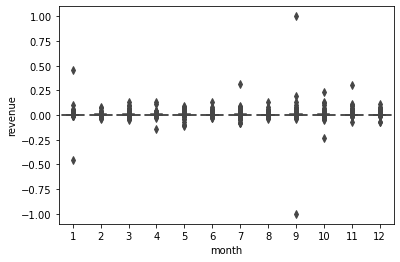

In [0]:
import matplotlib.pyplot as plt
#import seaborn as sns
#fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=df_norma['month'], y=df_norma['revenue']);
#ax.set_xlabel('month', fontsize=30);
#ax.set_ylabel('revenue', fontsize=30);
#sns.boxplot(x = 'month', y = 'revenue')

#fig, ax = plt.subplots(figsize=(10, 4))
#df_norma.plot(kind='box');
#df_norm['revenue_invoice_month_df'].plot(kind='box');

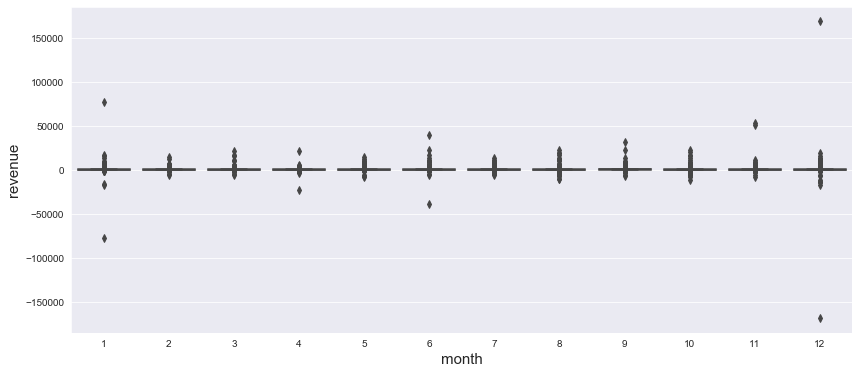

In [0]:
fig, ax = plt.subplots(figsize=(14, 6))


sns.boxplot(data=revenue_invoice_month_df, y='revenue', x='month', ax=ax);
ax.set_xlabel('month', fontsize=15);
ax.set_ylabel('revenue', fontsize=15);

# Vamos calcular a receita por país

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


In [0]:
df[['country', 'continent']] = df['region'].str.split(n=1, expand=True)

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,"(country, continent)",country,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,United Kingdom,United,Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,United Kingdom,United,Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom


### Podemos criar uma função

In [0]:
def separate_col(data, col, into):
    df = data.copy()
    df[into] = df[col].str.split(', ', expand=True)
    return df

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


In [0]:
df = df.drop(['country', 'continent'], axis=1)

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,"(country, continent)"
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom


In [0]:
#separate_col(df, col='region', into=['country', 'continent'])

In [0]:
#df.pipe(separate_col, col='region', into=['country', 'continent'])

Vamos generalizar a nossa função! Vamos incluir o argumento `sep` e `keep`.

In [0]:
def separate_col(data, col, into, sep=', ', keep=True):
    df = data.copy()
    df[into] = df[col].str.split(sep, expand=True)
    
    if keep:
        return df
    else:
        df = df.drop(col, axis=1)
        return df

In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-2353444867324160> in <cell line: 1>()
----> 1 df.pipe(separate_col, col='region', into=['country', 'continent'])

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in pipe(self, func, *args, **kwargs)
   5428         ...  )  # doctest: +SKIP
   5429         """
-> 5430         return com.pipe(self, func, *args, **kwargs)
   5431 
   5432     # ----------------------------------------------------------------------

/databricks/python/lib/python3.9/site-packages/pandas/core/common.py in pipe(obj, func, *args, **kwargs)
    469         return func(*args, **kwargs)
    470     else:
--> 471         return func(obj, *args, **kwargs)
    472 
    473 

<command-2353444867324159> in separate_col(data, col, into, sep, keep)
      1 def separate_col(data, col, into, sep=', ', keep=True):
      2     df = data.copy()


In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'], keep=False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00Z,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00Z,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09T12:50:00Z,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09T12:50:00Z,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09T12:50:00Z,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09T12:50:00Z,4.15,12680.0,France,Europe


### Retorne os 10 países com as maiores receitas.

In [0]:
top10_revenue_by_country_df = (
    df
    .pipe(separate_col, col='region', into=['country', 'continent'], keep=False)
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('country')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10)
)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<command-2353444867324163> in <cell line: 2>()
      1 top10_revenue_by_country_df = (
----> 2     df
      3     .pipe(separate_col, col='region', into=['country', 'continent'], keep=False)
      4     .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
      5     .groupby('country')

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in pipe(self, func, *args, **kwargs)
   5428         ...  )  # doctest: +SKIP
   5429         """
-> 5430         return com.pipe(self, func, *args, **kwargs)
   5431 
   5432     # ----------------------------------------------------------------------

/databricks/python/lib/python3.9/site-packages/pandas/core/common.py in pipe(obj, func, *args, **kwargs)
    469         return func(*args, **kwargs)
    470     else:
--> 471         return func(obj, *args, **kwargs)
    4

In [0]:
top10_revenue_by_country_df

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2353444867324164> in <cell line: 1>()
----> 1 top10_revenue_by_country_df

NameError: name 'top10_revenue_by_country_df' is not defined

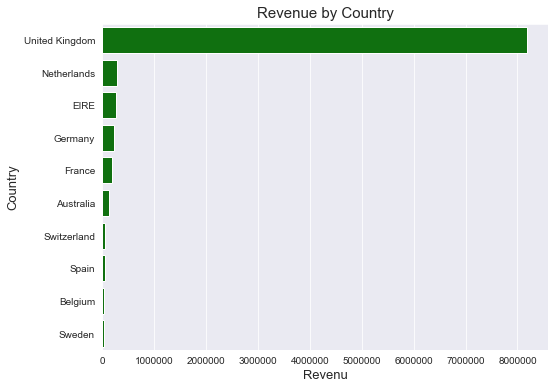

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=top10_revenue_by_country_df, y='country', x='revenue', ax=ax, color='green');
ax.set_ylabel('Country', fontsize=13);
ax.set_xlabel('Revenu', fontsize=13);
ax.set_title('Revenue by Country', fontsize=15);

### Vez de vocês! Façam o mesmo, mas para os continentes!

### Vamos calcular, para cada cliente, o seu RFV

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,start_with_c
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00Z,2.55,17850.0,"United Kingdom, Europe",False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00Z,2.75,17850.0,"United Kingdom, Europe",False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False


In [0]:
from datetime import datetime, date

rfv_df = (
    df
    .assign(total_price=df['quantity'] + df['unit_price'])
    .groupby(['customer_id'])
    .agg(revenue   = ('total_price', 'sum'), 
         frequency = ('invoice_no', 'count'), 
         last_shop = ('invoice_date', 'max'))
    .reset_index()
    .assign(last_shop = lambda x: pd.to_datetime(x['last_shop'], infer_datetime_format=True))
    .assign(ref_date = datetime.strptime('2012-01-01', '%Y-%m-%d'))
    .assign(recency = lambda x: (x['ref_date'] - x['last_shop']).dt.days)
    .filter(['ref_date', 'customer_id', 'revenue', 'frequency', 'recency'])
)

In [0]:
rfv_df

,ref_date,customer_id,revenue,frequency,recency
0,2012-01-01,12346.0,74216.04,1,347
1,2012-01-01,12347.0,2939.21,182,24
2,2012-01-01,12348.0,2519.71,31,97
3,2012-01-01,12349.0,1236.10,73,40
4,2012-01-01,12350.0,262.30,17,332
...,...,...,...,...,...
4334,2012-01-01,18280.0,92.65,10,299
4335,2012-01-01,18281.0,93.36,7,202
4336,2012-01-01,18282.0,165.39,12,29
4337,2012-01-01,18283.0,2617.93,756,25
